In [191]:
import re
import pandas as pd

# Read file

In [192]:
f = open("_chat.txt",'r',encoding='utf-8')

# Read data from file

In [193]:
data=f.read()
print(data)

[30.10.20, 17:45:15] Statistics: ‎Nachrichten und Anrufe sind Ende-zu-Ende-verschlüsselt. Niemand außerhalb dieses Chats kann sie lesen oder anhören, nicht einmal WhatsApp.
[30.10.20, 17:45:15] Statistics: ‎Der*Die Gruppengründer*in hat diese Gruppe erstellt.
[05.10.22, 15:18:35] Statistics: ‎Du bist der Gruppe mit dem Einladungslink beigetreten.
[05.10.22, 15:20:14] ~ Rao Shahan Naveed: ‎~ Rao Shahan Naveed ist der Gruppe mit dem Einladungslink beigetreten.
[05.10.22, 15:20:27] ~ Jacky: ‎~ Jacky ist der Gruppe mit dem Einladungslink beigetreten.
[05.10.22, 15:24:48] ~ 01575 5849976: ‎~ 01575 5849976 ist der Gruppe mit dem Einladungslink beigetreten.
[05.10.22, 15:25:28] ‪+49 178 6010741‬: ‎‪+49 178 6010741‬ ist der Gruppe mit dem Einladungslink beigetreten.
[05.10.22, 15:25:50] ~ F: ‎~ F ist der Gruppe mit dem Einladungslink beigetreten.
[05.10.22, 15:30:35] ‪+49 1578 7200491‬: ‎‪+49 1578 7200491‬ ist der Gruppe mit dem Einladungslink beigetreten.
[05.10.22, 15:47:27] ~ Vito: ‎~ Vito 

# Extract msg part from the text

In [194]:
pattern=r"\[\d{1,2}.\d{1,2}.\d{1,2},\s\d{1,2}:\d{1,2}:\d{1,2}\]\s"
msg=re.split(pattern,data)
msg=msg[1:]

# Extract date from text

In [195]:
pattern1="\d{1,2}.\d{1,2}.\d{1,2},\s\d{1,2}:\d{1,2}:\d{1,2}"
dates=re.findall(pattern1,data)
dates[0:10]

['30.10.20, 17:45:15',
 '30.10.20, 17:45:15',
 '05.10.22, 15:18:35',
 '05.10.22, 15:20:14',
 '05.10.22, 15:20:27',
 '05.10.22, 15:24:48',
 '05.10.22, 15:25:28',
 '05.10.22, 15:25:50',
 '05.10.22, 15:30:35',
 '05.10.22, 15:47:27']

In [196]:
len(dates)

4670

# creating pandas dataframe

In [197]:
df=pd.DataFrame({'user_msg':msg,'msg_date':dates})
df['msg_date']=pd.to_datetime(df['msg_date'])
df.head()

,user_msg,msg_date
0,Statistics: ‎Nachrichten und Anrufe sind Ende-...,2020-10-30 17:45:15
1,Statistics: ‎Der*Die Gruppengründer*in hat die...,2020-10-30 17:45:15
2,Statistics: ‎Du bist der Gruppe mit dem Einlad...,2022-05-10 15:18:35
3,~ Rao Shahan Naveed: ‎~ Rao Shahan Naveed ist ...,2022-05-10 15:20:14
4,~ Jacky: ‎~ Jacky ist der Gruppe mit dem Einla...,2022-05-10 15:20:27


In [198]:
df.tail()

,user_msg,msg_date
4665,~ .: https://en.wikipedia.org/wiki/Vietnamese-...,2023-05-10 11:18:32
4666,‪+91 92282 21922‬: ‎‪+91 92282 21922‬ ist der ...,2023-05-10 12:06:07
4667,‪+49 176 45962197‬: ‎‪+49 176 45962197‬ ist de...,2023-05-10 12:11:13
4668,~ Weiyi: ‎‎Deine Sicherheitsnummer für ‪+49 17...,2023-06-10 15:36:28
4669,~ Milad: ‎‎Deine Sicherheitsnummer für ‪+49 17...,2023-07-10 18:41:18


In [199]:
for ms in df['user_msg']:
    print(ms)

Streaming output truncated to the last 5000 lines.
~ Ceylo: Der schreibt

Ibo Brudi: Lernen

~ Elia: Macher

Ibo Brudi: 🤝

~ Ceylo: Ma shaa allah löwe

~ 🌅: Doch kommt dran ist inhalt von confidence interval hab das gefragt in vorlesung

~ Nabil: Was muss man darüber wissen?

~ EA: Hat jemand die Lösungen zu den altklausuren

Domi 🐸domi: was für ein exercise sheet ist das?

Domi 🐸domi: achso habs gefunden

~ Mladen: Hat der auch was zum Testing gesagt oder stimmt das nur t test dran kommt

Domi 🐸domi: Inferential Statistik 
- confidence intervals (proportions, evaluate lower and upper bounds from confidential intervals, normal approximation of normal bounds)
- Hypothesis testing ( understand the idea, t-test (exist different versions))

Domi 🐸domi: das alles

Safana: Weil die Varianz einer Konstanten ist 0

~ Vyy: Alles klar danke dir

~ Ceylo: T test und var test

~ Mladen: Ach du grüne neune , wozu hat der diese Notizen überhaupt gemacht ? Am Ende kommt descriptive statistics in Java

In [200]:
users=[]
msgs=[]
for ms in df['user_msg']:
    entry = re.split('([\w\W]+?):\s',ms)
    if entry[1:]:
       users.append(entry[1])
       msgs.append(entry[2])
    else:
        users.append('group_notification')
        msgs.append(entry[0])

In [201]:
df['user']=users
df['msg']=msgs

# have to remove those entries with group notification

In [202]:
df=df[~df['user'].str.contains('Informatik')]

In [203]:
def remove_text_with_security(text):
       #  pattern = r"Deine Sicherheitsnummer für \+[0-9]*\s[0-9]*\s[0-9]* hat sich geändert. Tippe, um mehr zu erfahren."
         pattern="Tippe, um mehr zu erfahren."
         match=(re.search(pattern,text))
         return bool(match)


In [204]:
df = df[~df['msg'].apply(remove_text_with_security)]

In [205]:
df.head(20)



,user_msg,msg_date,user,msg
0,Statistics: ‎Nachrichten und Anrufe sind Ende-...,2020-10-30 17:45:15,Statistics,‎Nachrichten und Anrufe sind Ende-zu-Ende-vers...
1,Statistics: ‎Der*Die Gruppengründer*in hat die...,2020-10-30 17:45:15,Statistics,‎Der*Die Gruppengründer*in hat diese Gruppe er...
2,Statistics: ‎Du bist der Gruppe mit dem Einlad...,2022-05-10 15:18:35,Statistics,‎Du bist der Gruppe mit dem Einladungslink bei...
3,~ Rao Shahan Naveed: ‎~ Rao Shahan Naveed ist ...,2022-05-10 15:20:14,~ Rao Shahan Naveed,‎~ Rao Shahan Naveed ist der Gruppe mit dem Ei...
4,~ Jacky: ‎~ Jacky ist der Gruppe mit dem Einla...,2022-05-10 15:20:27,~ Jacky,‎~ Jacky ist der Gruppe mit dem Einladungslink...
5,~ 01575 5849976: ‎~ 01575 5849976 ist der Grup...,2022-05-10 15:24:48,~ 01575 5849976,‎~ 01575 5849976 ist der Gruppe mit dem Einlad...
6,‪+49 178 6010741‬: ‎‪+49 178 6010741‬ ist der ...,2022-05-10 15:25:28,‪+49 178 6010741‬,‎‪+49 178 6010741‬ ist der Gruppe mit dem Einl...
7,~ F: ‎~ F ist der Gruppe mit dem Einladungslin...,2022-05-10 15:25:50,~ F,‎~ F ist der Gruppe mit dem Einladungslink bei...
8,‪+49 1578 7200491‬: ‎‪+49 1578 7200491‬ ist de...,2022-05-10 15:30:35,‪+49 1578 7200491‬,‎‪+49 1578 7200491‬ ist der Gruppe mit dem Ein...
9,~ Vito: ‎~ Vito ist der Gruppe mit dem Einladu...,2022-05-10 15:47:27,~ Vito,‎~ Vito ist der Gruppe mit dem Einladungslink ...


In [206]:
df['msg'][15]

'\u200eSafana ist der Gruppe mit dem Einladungslink beigetreten.\n'

In [207]:
remove_text_with_security('Deine Sicherheitsnummer für +49 177 5313599 hat sich geändert. Tippe, um mehr zu erfahren.')

True

# remove msg with invitation msg

In [208]:
def remove_text_with_invitation(text):
   return bool( re.search('ist der Gruppe mit dem Einladungslink beigetreten.',text) )

In [209]:
df[df['msg'].apply(remove_text_with_invitation)]

,user_msg,msg_date,user,msg
2,Statistics: ‎Du bist der Gruppe mit dem Einlad...,2022-05-10 15:18:35,Statistics,‎Du bist der Gruppe mit dem Einladungslink bei...
3,~ Rao Shahan Naveed: ‎~ Rao Shahan Naveed ist ...,2022-05-10 15:20:14,~ Rao Shahan Naveed,‎~ Rao Shahan Naveed ist der Gruppe mit dem Ei...
4,~ Jacky: ‎~ Jacky ist der Gruppe mit dem Einla...,2022-05-10 15:20:27,~ Jacky,‎~ Jacky ist der Gruppe mit dem Einladungslink...
5,~ 01575 5849976: ‎~ 01575 5849976 ist der Grup...,2022-05-10 15:24:48,~ 01575 5849976,‎~ 01575 5849976 ist der Gruppe mit dem Einlad...
6,‪+49 178 6010741‬: ‎‪+49 178 6010741‬ ist der ...,2022-05-10 15:25:28,‪+49 178 6010741‬,‎‪+49 178 6010741‬ ist der Gruppe mit dem Einl...
...,...,...,...,...
4643,~ Schüler…: ‎~ Schüler… ist der Gruppe mit dem...,2023-09-20 22:26:46,~ Schüler…,‎~ Schüler… ist der Gruppe mit dem Einladungsl...
4653,~ Janny: ‎~ Janny ist der Gruppe mit dem Einla...,2023-03-10 16:02:21,~ Janny,‎~ Janny ist der Gruppe mit dem Einladungslink...
4654,‪+49 172 9262770‬: ‎‪+49 172 9262770‬ ist der ...,2023-04-10 18:18:11,‪+49 172 9262770‬,‎‪+49 172 9262770‬ ist der Gruppe mit dem Einl...
4666,‪+91 92282 21922‬: ‎‪+91 92282 21922‬ ist der ...,2023-05-10 12:06:07,‪+91 92282 21922‬,‎‪+91 92282 21922‬ ist der Gruppe mit dem Einl...


In [210]:
df=df[~df['msg'].apply(remove_text_with_invitation)]

In [211]:
df.head()

,user_msg,msg_date,user,msg
0,Statistics: ‎Nachrichten und Anrufe sind Ende-...,2020-10-30 17:45:15,Statistics,‎Nachrichten und Anrufe sind Ende-zu-Ende-vers...
1,Statistics: ‎Der*Die Gruppengründer*in hat die...,2020-10-30 17:45:15,Statistics,‎Der*Die Gruppengründer*in hat diese Gruppe er...
29,~ rekeksa: ‎‎~ rekeksa hat die Telefonnummer g...,2022-09-10 23:49:32,~ rekeksa,‎‎~ rekeksa hat die Telefonnummer gewechselt. ...
35,~ Marius: Hat jemand schon den Einschreibe Sch...,2022-10-13 19:10:29,~ Marius,Hat jemand schon den Einschreibe Schlüssel für...
36,~ Nico: https://campuas.frankfurt-university.d...,2022-10-13 19:11:17,~ Nico,https://campuas.frankfurt-university.de/course...


In [212]:
def remove_text_with_group_builder(text):

    return bool(re.search('hat die Gruppe erstellt.',text)) or bool(re.search('hat die Gruppenbeschreibung geändert.',text))

In [213]:
df=df[~df['msg'].apply(remove_text_with_group_builder)]
df.head(10)

,user_msg,msg_date,user,msg
0,Statistics: ‎Nachrichten und Anrufe sind Ende-...,2020-10-30 17:45:15,Statistics,‎Nachrichten und Anrufe sind Ende-zu-Ende-vers...
1,Statistics: ‎Der*Die Gruppengründer*in hat die...,2020-10-30 17:45:15,Statistics,‎Der*Die Gruppengründer*in hat diese Gruppe er...
29,~ rekeksa: ‎‎~ rekeksa hat die Telefonnummer g...,2022-09-10 23:49:32,~ rekeksa,‎‎~ rekeksa hat die Telefonnummer gewechselt. ...
35,~ Marius: Hat jemand schon den Einschreibe Sch...,2022-10-13 19:10:29,~ Marius,Hat jemand schon den Einschreibe Schlüssel für...
36,~ Nico: https://campuas.frankfurt-university.d...,2022-10-13 19:11:17,~ Nico,https://campuas.frankfurt-university.de/course...
37,~ Marius: dangö\n,2022-10-13 19:14:13,~ Marius,dangö\n
44,~ Slavic: ‎~ Slavic hat den Gruppennamen zu „S...,2022-10-15 14:36:53,~ Slavic,‎~ Slavic hat den Gruppennamen zu „Statistik W...
52,~ Sercan: Die übungen fallen heute aus oder ?\n,2022-10-17 01:23:57,~ Sercan,Die übungen fallen heute aus oder ?\n
53,Muntaha : Vorlesung fängt ab Dienstag\n,2022-10-17 03:49:44,Muntaha,Vorlesung fängt ab Dienstag\n
60,~ Mouad: Morgen schon\n,2022-10-17 15:13:20,~ Mouad,Morgen schon\n


In [214]:
for ms in df['msg']:
  print(ms)

Streaming output truncated to the last 5000 lines.

Du musst erstmal baumdiagramm bei 1 machen

Und bei der zwei handelt es sich glaube ich um ne binomial Verteilung.

P(kaputt) kriegst du raus mit 0.04*0.05*0.01 und ab da machst du einfach binomial Wahrscheinlichkeit

Wobei

Ich glaube p(kaputt) wird eher so gerechnet dass du die Äste des baumdiagramms dudcgehsf wo ein Defekt vorkommt

‎Diese Nachricht wurde gelöscht.

Hat jemand einschreibeschlüssel von  Falkenberg Kurs ?
‎
‎Bild weggelassen
‎
‎Bild weggelassen
‎
‎Bild weggelassen
‎
‎Bild weggelassen

Schreib jemand der hier drinne ist reinzufällig morgen DB beim rich ?

Ja. Wieso?

Hi

Kurze Frage die Klausur ist immer noch morgen um 14 Uhr oder ?

Und weißt du rein zufällig ob concurrency control drinne ist oder nicht ?

14 Uhr in 1-131
Da mit Concurrency control ja auch serializable, usw. gemeint ist, sollte es in der Klausur vorkommen können.

Alles klar besten Dank auch 👍🏻

Gerne.
‎
‎Bild weggelassen

Wenn keine weiteren Bibliot

In [215]:
df.drop(columns='user_msg',axis='column',inplace=True)
df

,msg_date,user,msg
0,2020-10-30 17:45:15,Statistics,‎Nachrichten und Anrufe sind Ende-zu-Ende-vers...
1,2020-10-30 17:45:15,Statistics,‎Der*Die Gruppengründer*in hat diese Gruppe er...
29,2022-09-10 23:49:32,~ rekeksa,‎‎~ rekeksa hat die Telefonnummer gewechselt. ...
35,2022-10-13 19:10:29,~ Marius,Hat jemand schon den Einschreibe Schlüssel für...
36,2022-10-13 19:11:17,~ Nico,https://campuas.frankfurt-university.de/course...
...,...,...,...
4661,2023-05-10 11:00:15,~ Pouya,statistics_ws_23\n
4662,2023-05-10 11:01:34,~ S,Was heißt dieses VGU\n
4663,2023-05-10 11:03:36,~ Albin,Austausch Studenten\n
4664,2023-05-10 11:03:49,~ S,Danke dir\n


In [308]:
df['month']=df['msg_date'].dt.month_name()
df['day']=df['msg_date'].dt.day
df['year']=df['msg_date'].dt.year
df['hour']=df['msg_date'].dt.hour
df['minute']=df['msg_date'].dt.minute
df['monthNumerical']=df['msg_date'].dt.month
df['day-name']=df['msg_date'].dt.day_name()

df.head()

,msg_date,user,msg,month,day,year,hour,minute,monthNumerical,time_of_day,day-name
0,2020-10-30 17:45:15,Statistics,‎Nachrichten und Anrufe sind Ende-zu-Ende-vers...,October,30,2020,17,45,10,nachmittag,Friday
1,2020-10-30 17:45:15,Statistics,‎Der*Die Gruppengründer*in hat diese Gruppe er...,October,30,2020,17,45,10,nachmittag,Friday
29,2022-09-10 23:49:32,~ rekeksa,‎‎~ rekeksa hat die Telefonnummer gewechselt. ...,September,10,2022,23,49,9,abend,Saturday
35,2022-10-13 19:10:29,~ Marius,Hat jemand schon den Einschreibe Schlüssel für...,October,13,2022,19,10,10,abend,Thursday
36,2022-10-13 19:11:17,~ Nico,https://campuas.frankfurt-university.de/course...,October,13,2022,19,11,10,abend,Thursday


# find total number of words

In [217]:
cnt = 0
for ms in df['msg']:
  cnt+=len(ms.split())
cnt

29006

# find number of media shared

In [218]:
df[df['msg'].str.contains("weggelassen")].shape[0]


464

# find number of link shared

In [219]:
!pip install URLExtract
from urlextract import URLExtract

In [220]:
urlExtracter = URLExtract()
urlExtracter.find_urls("www.google.com hello world https://www.facebool.com")

['www.google.com', 'https://www.facebool.com']

In [221]:
urls=[]
for ms in df['msg']:
    urls+=urlExtracter.find_urls(ms)
len(urls)

32

# get top 5 chatter

In [222]:
top_chatter=df['user'].value_counts().sort_values(ascending=False).nlargest(5)

In [223]:
top_chatter.values

array([445, 261, 251, 166, 155])

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns

([0, 1, 2, 3, 4],
 [Text(0, 0, '~\u202fMouad'),
  Text(1, 0, 'Domi 🐸domi'),
  Text(2, 0, 'Ibo Brudi'),
  Text(3, 0, '~\u202fMladen'),
  Text(4, 0, '~\u202fCeylo')])

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128056 (\N{FROG FACE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128056 (\N{FROG FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


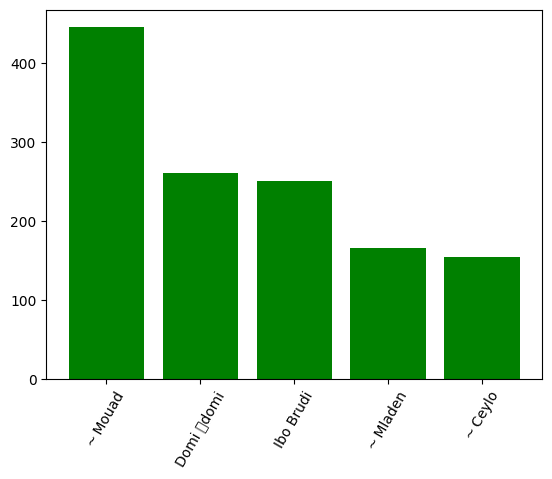

In [225]:
plt.bar(top_chatter.index,top_chatter.values,color="green")
plt.xticks(rotation=60)

In [226]:
round(df['user'].value_counts()/df.shape[0]*100,2).reset_index().rename(columns={'index':'name','user':'percent(%)'})


,name,percent(%)
0,~ Mouad,10.46
1,Domi 🐸domi,6.14
2,Ibo Brudi,5.90
3,~ Mladen,3.90
4,~ Ceylo,3.64
...,...,...
171,~ ~Adil,0.02
172,~ Aaron N.,0.02
173,~ 😎,0.02
174,~ Jalal,0.02


# find top 10 used words

In [227]:
german_stopwords = [
    "aber", "als", "an", "auch", "auf", "aus", "bei", "bin", "bis", "da",
    "dann", "der", "des", "die", "doch", "du", "ein", "eine", "einen", "einer",
    "den",'hat','für','diese','ich','das','ist','und','er','in','mit','zu','wie','oder',
    'zu','jemand','\u200e','ja','man','nicht','kann','was','schon','wenn','war','mir','es','?','so',
    'dir','wir','mal','wird','wurde','hab','the','von','ihr','sein','ob','nur','noch','dass','gelöscht',
    'also','sind','haben','machen','sich','kommt','dem','nachricht','gemacht'
]

In [228]:
tmp=df[~df['msg'].str.contains("weggelassen")]
words=[]
for ms in tmp['msg']:
  for word in ms.split():
       if word.lower() not in german_stopwords and len(word)>6:
          words.append(word.lower())
words


['\u200enachrichten',
 'ende-zu-ende-verschlüsselt.',
 'niemand',
 'außerhalb',
 'anhören,',
 'whatsapp.',
 '\u200eder*die',
 'gruppengründer*in',
 'erstellt.',
 'rekeksa',
 'telefonnummer',
 'gewechselt.',
 '\u200etippe,',
 'anzuschreiben',
 'hinzuzufügen.',
 'einschreibe',
 'schlüssel',
 'statistik',
 'übungsgruppe',
 'https://campuas.frankfurt-university.de/course/view.php?id=1475&section=1',
 'gruppennamen',
 '„statistik',
 'geändert.',
 'übungen',
 'vorlesung',
 'dienstag',
 'einführungswoche',
 'einführung',
 'gehabt.',
 'vorlesungen',
 'stundenplan',
 'falkenberg',
 'aufnehmen',
 'hochladen',
 'hochgeladen',
 'übungen?',
 'solange',
 'stundenplan',
 'verlernt',
 'passiert',
 'schlechtesten',
 'tatsache',
 'statistik',
 'vorlesungen',
 'findet?auf',
 'stundenplan',
 'gebäude',
 'gemeint',
 'gebäude',
 'gefunden?',
 'nachhinein',
 'hybridform,',
 'beitreten',
 'diesmal',
 'hybrid,',
 'asynchron',
 'anschauen',
 'kannst.',
 'verwirrt',
 'ständen',
 'zugangsdaten',
 'einfach',
 'geh

In [230]:
from collections import Counter

pd.DataFrame(Counter(words).most_common(20)).


SyntaxError: ignored

In [231]:
for w in words:
  print(w,end=',')

‎nachrichten,ende-zu-ende-verschlüsselt.,niemand,außerhalb,anhören,,whatsapp.,‎der*die,gruppengründer*in,erstellt.,rekeksa,telefonnummer,gewechselt.,‎tippe,,anzuschreiben,hinzuzufügen.,einschreibe,schlüssel,statistik,übungsgruppe,https://campuas.frankfurt-university.de/course/view.php?id=1475&section=1,gruppennamen,„statistik,geändert.,übungen,vorlesung,dienstag,einführungswoche,einführung,gehabt.,vorlesungen,stundenplan,falkenberg,aufnehmen,hochladen,hochgeladen,übungen?,solange,stundenplan,verlernt,passiert,schlechtesten,tatsache,statistik,vorlesungen,findet?auf,stundenplan,gebäude,gemeint,gebäude,gefunden?,nachhinein,hybridform,,beitreten,diesmal,hybrid,,asynchron,anschauen,kannst.,verwirrt,ständen,zugangsdaten,einfach,geholt.,gekommen,aufgenommen,teilnehmen,ansonsten,präsenz,erstellt,,geschrieben?,informatik,projekte,wleches,*nicht*,projekt,drahtlose,sensornetzwerke,rüberkopiert.,aufzeichnung,anstrengender,präsenz,präsens,falkenberg,online.,aufgezeichnet,..außer,infektionszahlen,st

## find emojis used

In [232]:
for ms  in df['msg']:
  print(ms)

‎Nachrichten und Anrufe sind Ende-zu-Ende-verschlüsselt. Niemand außerhalb dieses Chats kann sie lesen oder anhören, nicht einmal WhatsApp.

‎Der*Die Gruppengründer*in hat diese Gruppe erstellt.

‎‎~ rekeksa hat die Telefonnummer gewechselt. ‎Tippe, um die neue Nummer anzuschreiben oder sie hinzuzufügen.

Hat jemand schon den Einschreibe Schlüssel für die Statistik Grupee 

auch wegen Übungsgruppe

https://campuas.frankfurt-university.de/course/view.php?id=1475&section=1

dangö

‎~ Slavic hat den Gruppennamen zu „Statistik WS“ geändert.

Die übungen fallen heute aus oder ?

Vorlesung fängt ab Dienstag

Morgen schon

Wie ist es mit Einführungswoche der erstis

Die haben heute Einführung gehabt. Ab morgen Vorlesungen

OK danke dir

Wie viel Uhr und Raum bitte

Steht alles im Stundenplan
‎
WS 2022_23_I_v3.pdf • ‎14 Seiten ‎Dokument weggelassen

Weiß jemand ob Falkenberg seine Vl & Übung aufnehmen und hochladen wird?

Bis jetzt hat er immer seine vl. Hochgeladen

ok und übungen?

Ka

ok da

In [273]:
!pip install emoji
import emoji

def extract_emojis(s):
  return (emoji.emoji_list(s))


In [262]:
tmp=df.copy()

In [286]:
tmp=tmp[tmp['user']=='Hamza']
x = []
emojis = tmp['msg'].apply(extract_emojis)
pd.DataFrame(emojis)



,msg
3591,[]
4542,[]


In [269]:
emoji=[]
for e in emojis[0]:
  if len(e)!=0:
    for obj in e:
      emoji.append(obj['emoji'])
from collections import Counter
df_em=pd.DataFrame(Counter(emoji).most_common(len(emoji)))
df_em.shape

(0, 0)

In [241]:
emojis=[]
emojis.append(df['msg'].apply(extract_emojis))


In [242]:
emoji=[]
for e in emojis[0]:
  if len(e)!=0:
    for obj in e:
      emoji.append(obj['emoji'])
from collections import Counter
df_em=pd.DataFrame(Counter(emoji).most_common(len(emoji)))

In [243]:
df_em.head()

,0,1
0,😂,145
1,🤣,34
2,🥲,24
3,😅,20
4,👍🏻,18


In [ ]:
df_em=df_em.rename(columns={0:'emoji',1:'count'}).nlargest(n=10,columns='count')

In [ ]:

plt.pie(df_em["count"], labels=df_em["emoji"])
plt.show()

# time line analysis

# month-year timeline

In [ ]:
timeline=df.groupby(['year','month','monthNumerical']).count()['msg'].reset_index()

In [ ]:
df['month'].iloc[2]

In [ ]:
time=[]
for i in range(timeline.shape[0]):
   time.append(timeline['month'].iloc[i]+'-'+str(timeline['year'].iloc[i]))
timeline['month-year']=time
timeline.sort_values(by=['year','monthNumerical']).reset_index(drop=True)

In [ ]:
plt.plot(timeline['month-year'],timeline['msg'])
plt.xticks(rotation=90)
plt.show()

# weekly timeline

In [ ]:

df['only-date']=df['msg_date'].dt.date
df.head()

In [ ]:
daily_timeline=df.groupby('only-date').count()['msg'].reset_index().sort_values(by='only-date')

In [ ]:
plt.figure(figsize=(20,20))
plt.plot(daily_timeline['only-date'],daily_timeline['msg'])
plt.xticks(rotation=45)
plt.show()

In [312]:
df['hour'].value_counts()

13    367
20    364
15    335
18    326
21    319
11    299
17    292
22    286
16    276
12    235
14    229
19    217
23    198
10    192
9      97
0      80
8      52
7      51
6      13
1      11
5       8
2       5
4       1
3       1
Name: hour, dtype: int64

# Hourly timeline

In [313]:
bin_edges = [0, 12, 18, 23]  # Bins for 'before noon', 'after noon', and 'evening'
bin_labels = ["vormittag", "nachmittag", "abend"]

# Categorize the 'hour' column into bins
df['time_of_day'] = pd.cut(df['hour'].astype(int), bins=bin_edges, labels=bin_labels)

df.loc[:,['time_of_day','hour']].head(20)


,time_of_day,hour
0,nachmittag,17
1,nachmittag,17
29,abend,23
35,abend,19
36,abend,19
37,abend,19
44,nachmittag,14
52,vormittag,1
53,vormittag,3
60,nachmittag,15


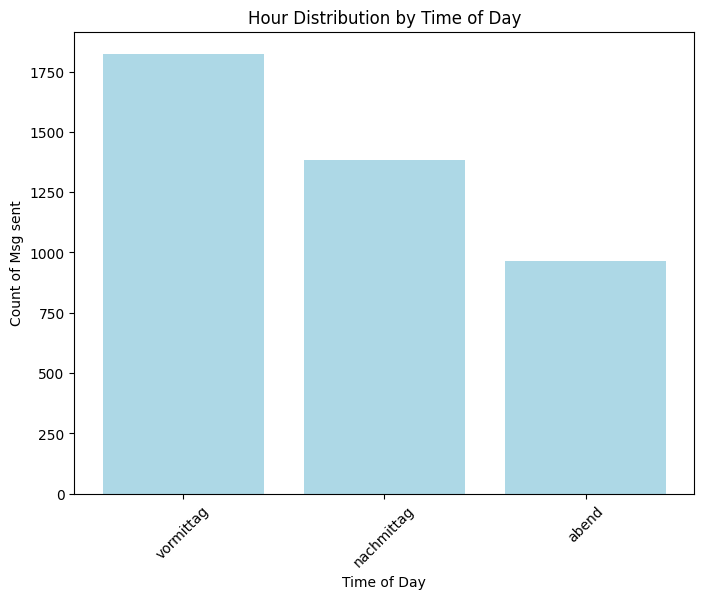

In [314]:
# Plot a histogram
plt.figure(figsize=(8, 6))
#plt.hist(df['hour-grouped'], bins=3, rwidth=0.9, color='lightblue', edgecolor='black')
plt.bar(group_names,df['time_of_day'].value_counts(),color='lightblue',)
plt.xlabel('Time of Day')
plt.ylabel('Count of Msg sent')
plt.title('Hour Distribution by Time of Day')
plt.xticks(rotation=45)
plt.show()

# Most busy Month

In [306]:
df.groupby('month').count()['msg'].reset_index().sort_values(by='msg',ascending=False).reset_index(drop=True)

,month,msg
0,February,1145
1,May,777
2,October,544
3,January,393
4,July,273
5,March,236
6,December,217
7,April,177
8,June,168
9,August,147


# Most busy day

In [309]:
df.groupby('day-name').count()['msg'].reset_index().sort_values(by='msg',ascending=False).reset_index(drop=True)

,day-name,msg
0,Monday,819
1,Wednesday,757
2,Tuesday,737
3,Sunday,675
4,Thursday,495
5,Saturday,463
6,Friday,308


# user activity visualization using Heatmap

In [310]:
df

,msg_date,user,msg,month,day,year,hour,minute,monthNumerical,time_of_day,day-name
0,2020-10-30 17:45:15,Statistics,‎Nachrichten und Anrufe sind Ende-zu-Ende-vers...,October,30,2020,17,45,10,nachmittag,Friday
1,2020-10-30 17:45:15,Statistics,‎Der*Die Gruppengründer*in hat diese Gruppe er...,October,30,2020,17,45,10,nachmittag,Friday
29,2022-09-10 23:49:32,~ rekeksa,‎‎~ rekeksa hat die Telefonnummer gewechselt. ...,September,10,2022,23,49,9,abend,Saturday
35,2022-10-13 19:10:29,~ Marius,Hat jemand schon den Einschreibe Schlüssel für...,October,13,2022,19,10,10,abend,Thursday
36,2022-10-13 19:11:17,~ Nico,https://campuas.frankfurt-university.de/course...,October,13,2022,19,11,10,abend,Thursday
...,...,...,...,...,...,...,...,...,...,...,...
4661,2023-05-10 11:00:15,~ Pouya,statistics_ws_23\n,May,10,2023,11,0,5,vormittag,Wednesday
4662,2023-05-10 11:01:34,~ S,Was heißt dieses VGU\n,May,10,2023,11,1,5,vormittag,Wednesday
4663,2023-05-10 11:03:36,~ Albin,Austausch Studenten\n,May,10,2023,11,3,5,vormittag,Wednesday
4664,2023-05-10 11:03:49,~ S,Danke dir\n,May,10,2023,11,3,5,vormittag,Wednesday


In [315]:
period=[]
for hour in df['hour']:
  if hour==23:
    period.append(str(hour)+'-'+str('00'))
  elif hour==0:
    period.append(str('00')+'-'+str(hour+1))
  else:
    period.append(str(hour)+'-'+str(hour+1))



In [317]:
df['period']=period
df.head()

,msg_date,user,msg,month,day,year,hour,minute,monthNumerical,time_of_day,day-name,period
0,2020-10-30 17:45:15,Statistics,‎Nachrichten und Anrufe sind Ende-zu-Ende-vers...,October,30,2020,17,45,10,nachmittag,Friday,17-18
1,2020-10-30 17:45:15,Statistics,‎Der*Die Gruppengründer*in hat diese Gruppe er...,October,30,2020,17,45,10,nachmittag,Friday,17-18
29,2022-09-10 23:49:32,~ rekeksa,‎‎~ rekeksa hat die Telefonnummer gewechselt. ...,September,10,2022,23,49,9,abend,Saturday,23-00
35,2022-10-13 19:10:29,~ Marius,Hat jemand schon den Einschreibe Schlüssel für...,October,13,2022,19,10,10,abend,Thursday,19-20
36,2022-10-13 19:11:17,~ Nico,https://campuas.frankfurt-university.de/course...,October,13,2022,19,11,10,abend,Thursday,19-20


In [318]:
import seaborn as sns



In [321]:
df.pivot_table(index='day-name',columns='period',values='msg',aggfunc='count').fillna(0)

period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,21-22,22-23,23-00,3-4,4-5,5-6,6-7,7-8,8-9,9-10
day-name,,,,,,,,,,,,,,,,,,,,,
Friday,0.0,4.0,15.0,12.0,15.0,27.0,11.0,28.0,16.0,23.0,...,30.0,18.0,9.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0
Monday,1.0,1.0,14.0,35.0,73.0,54.0,67.0,73.0,46.0,38.0,...,23.0,73.0,67.0,1.0,0.0,0.0,0.0,6.0,2.0,3.0
Saturday,15.0,0.0,5.0,24.0,14.0,28.0,18.0,67.0,52.0,59.0,...,38.0,6.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
Sunday,9.0,3.0,12.0,84.0,28.0,44.0,16.0,40.0,39.0,92.0,...,107.0,9.0,4.0,0.0,0.0,0.0,11.0,11.0,6.0,1.0
Thursday,34.0,2.0,55.0,23.0,28.0,45.0,52.0,28.0,8.0,45.0,...,9.0,24.0,2.0,0.0,0.0,1.0,0.0,17.0,6.0,29.0
Tuesday,18.0,1.0,65.0,83.0,41.0,73.0,35.0,40.0,36.0,22.0,...,23.0,62.0,71.0,0.0,0.0,6.0,2.0,17.0,29.0,37.0
Wednesday,3.0,0.0,26.0,38.0,36.0,96.0,30.0,59.0,79.0,13.0,...,89.0,94.0,22.0,0.0,0.0,1.0,0.0,0.0,8.0,20.0


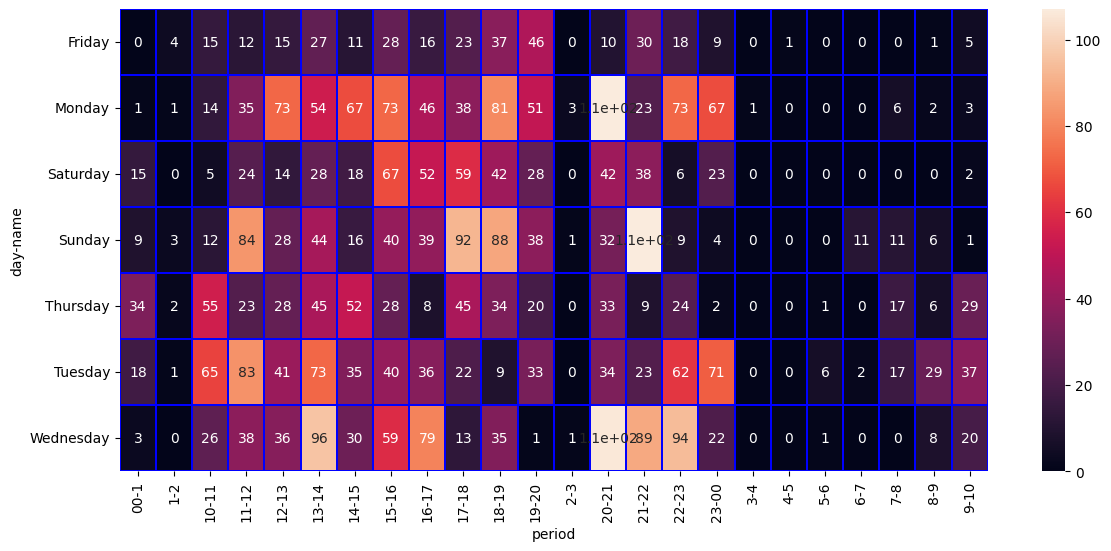

In [341]:
plt.figure(figsize=(14,6))
sns.heatmap(df.pivot_table(index='day-name',columns='period',values='msg',aggfunc='count').fillna(0),annot=True, linewidth=.01,linecolor="blue")

plt.show()